<a href="https://colab.research.google.com/github/Sahil2004/cs-practicals/blob/main/6th%20sem/%5B01%5D%20Data%20Mining%20and%20Analysis/%5B09%5D%20Practical%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Data Pre-processing

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/CO22358_gearpartsales.csv')
X = dataset.iloc[:, [2, 3, 5, 6, 7]].values
y = dataset.iloc[:, 3].values

## Handling the missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer=imputer.fit(X[:,3:])
X[:,3:]=imputer.transform(X[:,3:])

## Encoding of categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X=LabelEncoder()
for col in range(X.shape[1]):  # Loop through all columns
    X[:, col] = labelencoder_X.fit_transform(X[:, col])  # Ensure 1D conversion

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
  [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2])],
  remainder='passthrough'
)
X = ct.fit_transform(X)
labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_mean=False)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Step 2: Training of the Model

## Fitting Logistic Regression to the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## Plotting the Confusion Matrix

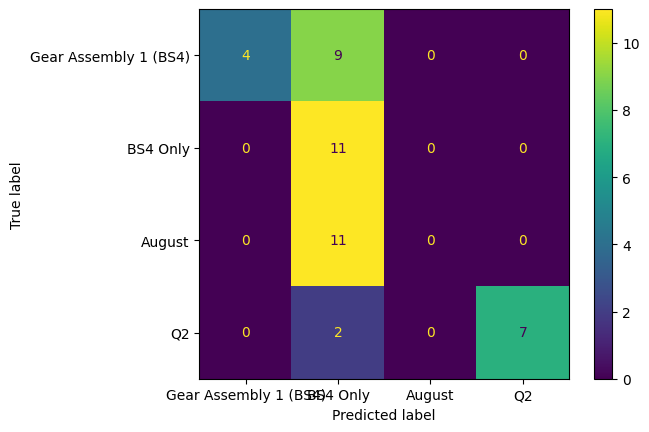

In [ ]:
classes= dataset.iloc[4].unique();
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

## Accuracy

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print(accuracy)

0.3409090909090909


## Recall

In [ ]:
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print(recall)

1.0


## Precision

In [ ]:
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print(precision)

1.0


## F1 Score

In [ ]:
f1score = 2 * precision * recall / (precision + recall)
print(f1score)

1.0


# Step 2. Training of the Model

## Fitting K Nearest Neighbours to the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## Plotting the Confusion Matrix

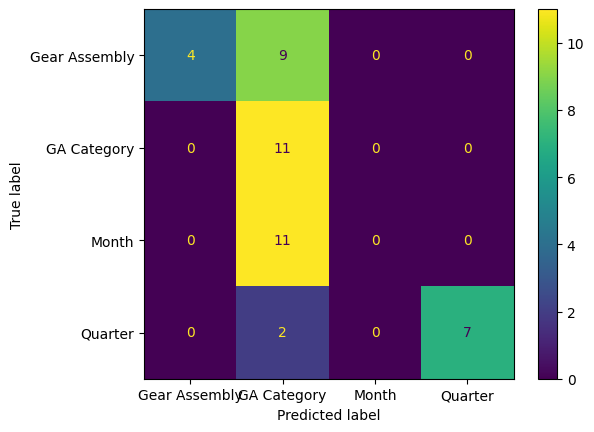

In [ ]:
classes= dataset.columns.values;
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[:cm.shape[0]])
disp.plot()
plt.show()

## Accuracy

In [ ]:
accuracy = cm[0][0] + cm[1][1]
accuracy = accuracy / cm.sum()
print(accuracy)

0.3409090909090909


## Recall

In [ ]:
recall = cm[0][0] / (cm[0][0] + cm[0][1])
print(recall)

0.3076923076923077


## Precision

In [ ]:
precision = cm[0][0] / (cm[0][0] + cm[1][0])
print(precision)

1.0


## F1 Score

In [ ]:
f1score = 2 * precision * recall / (precision + recall)
print(f1score)

0.47058823529411764
